## Cryptocurrency Volatility Prediction

## Problem statement
'''
In this project, you are required to build a machine learning model to predict cryptocurrency volatility levels
based on historical market data such as OHLC (Open, High, Low, Close) prices, trading volume, and market
capitalization. The objective is to anticipate periods of heightened volatility, enabling traders and financial
institutions to manage risks and make informed decisions.


Your final model should provide insights into market stability by forecasting volatility variations, allowing
stakeholders to proactively respond to changing market conditions.

    '''

In [203]:
## Important lib for project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [116]:
## Reading dataset 

df = pd.read_csv('dataset.csv')

In [117]:
df.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [118]:
df.tail()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
72941,72941,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,2022-10-23T23:59:59.999Z,VeChain,2022-10-23
72942,72942,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,2022-10-23T23:59:59.999Z,Flow,2022-10-23
72943,72943,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,2022-10-23T23:59:59.999Z,Filecoin,2022-10-23
72944,72944,0.000233,0.000243,0.000226,0.000239,2.143268e+08,1.576291e+09,2022-10-23T23:59:59.999Z,Terra Classic,2022-10-23
72945,72945,0.465490,0.471006,0.453438,0.469033,9.509743e+08,2.339868e+10,2022-10-23T23:59:59.999Z,XRP,2022-10-23


In [119]:
df.shape

(72946, 10)

##Data Preprocessing Require

'''Handle missing values and ensure data consistencb
   Normalize and scale numerical feature=
  Engineer new features related to volatility and liquidity trends '''

In [120]:
df.isnull().sum()

Unnamed: 0     0
open           0
high           0
low            0
close          0
volume         0
marketCap      0
timestamp      0
crypto_name    0
date           0
dtype: int64

In [121]:
df.isna().sum()

Unnamed: 0     0
open           0
high           0
low            0
close          0
volume         0
marketCap      0
timestamp      0
crypto_name    0
date           0
dtype: int64

In [122]:
df.describe()

,Unnamed: 0,open,high,low,close,volume,marketCap
count,72946.000000,72946.000000,7.294600e+04,72946.000000,7.294600e+04,7.294600e+04,7.294600e+04
mean,36472.500000,870.194495,8.964124e+02,844.060640,8.712949e+02,2.207607e+09,1.474922e+10
std,21057.840705,5231.654470,5.398613e+03,5079.389387,5.235508e+03,9.617885e+09,7.501159e+10
min,0.000000,0.000000,1.022100e-10,0.000000,8.292000e-11,0.000000e+00,0.000000e+00
25%,18236.250000,0.167916,1.767999e-01,0.158630,1.682982e-01,8.320618e+06,1.860432e+08
50%,36472.500000,1.630666,1.717542e+00,1.541486,1.640219e+00,1.098756e+08,1.268539e+09
75%,54708.750000,26.070557,2.756868e+01,24.791776,2.625195e+01,6.691398e+08,5.118618e+09
max,72945.000000,67549.735581,1.621883e+05,66458.723733,6.756683e+04,3.509679e+11,1.274831e+12


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   72946 non-null  int64  
 1   open         72946 non-null  float64
 2   high         72946 non-null  float64
 3   low          72946 non-null  float64
 4   close        72946 non-null  float64
 5   volume       72946 non-null  float64
 6   marketCap    72946 non-null  float64
 7   timestamp    72946 non-null  object 
 8   crypto_name  72946 non-null  object 
 9   date         72946 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.6+ MB


In [124]:
df["Date"]=pd.to_datetime(df["date"])

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   72946 non-null  int64         
 1   open         72946 non-null  float64       
 2   high         72946 non-null  float64       
 3   low          72946 non-null  float64       
 4   close        72946 non-null  float64       
 5   volume       72946 non-null  float64       
 6   marketCap    72946 non-null  float64       
 7   timestamp    72946 non-null  object        
 8   crypto_name  72946 non-null  object        
 9   date         72946 non-null  object        
 10  Date         72946 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 6.1+ MB


In [126]:
df.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date,Date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07,2013-05-07


In [127]:
df=df.drop(columns='date')

In [128]:
df.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,Date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [129]:
df['crypto_name'].unique()

array(['Bitcoin', 'Litecoin', 'XRP', 'Dogecoin', 'Monero', 'Stellar',
       'Tether', 'Ethereum', 'Ethereum Classic', 'Maker',
       'Basic Attention Token', 'EOS', 'Bitcoin Cash', 'BNB', 'TRON',
       'Decentraland', 'Chainlink', 'Cardano', 'Filecoin',
       'Theta Network', 'Huobi Token', 'Ravencoin', 'Tezos', 'VeChain',
       'Quant', 'USD Coin', 'Cronos', 'Wrapped Bitcoin', 'Cosmos',
       'Polygon', 'OKB', 'UNUS SED LEO', 'Algorand', 'Chiliz',
       'THORChain', 'Terra Classic', 'FTX Token', 'Hedera', 'Binance USD',
       'Dai', 'Solana', 'Avalanche', 'Shiba Inu', 'The Sandbox',
       'Polkadot', 'Elrond', 'Uniswap', 'Aave', 'NEAR Protocol', 'Flow',
       'Internet Computer', 'Casper', 'Toncoin', 'Chain', 'ApeCoin',
       'Aptos'], dtype=object)

In [130]:
df['crypto_name_int'] = le.fit_transform(df['crypto_name'])

In [131]:
df['crypto_name_int'] = df['crypto_name_int'].astype(int)

In [132]:
df.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,Date,crypto_name_int
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05,8
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05,30
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06,8
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06,30
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07,8


In [133]:
df=df.drop(columns='crypto_name')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       72946 non-null  int64         
 1   open             72946 non-null  float64       
 2   high             72946 non-null  float64       
 3   low              72946 non-null  float64       
 4   close            72946 non-null  float64       
 5   volume           72946 non-null  float64       
 6   marketCap        72946 non-null  float64       
 7   timestamp        72946 non-null  object        
 8   Date             72946 non-null  datetime64[ns]
 9   crypto_name_int  72946 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 5.6+ MB


In [135]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [136]:
categorical_cols

['timestamp']

In [137]:
numeric_cols

['Unnamed: 0',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'marketCap',
 'crypto_name_int']

In [138]:
df['Unnamed: 0']

0            0
1            1
2            2
3            3
4            4
         ...  
72941    72941
72942    72942
72943    72943
72944    72944
72945    72945
Name: Unnamed: 0, Length: 72946, dtype: int64

In [139]:
df = df.drop(columns=['Unnamed: 0']).reset_index(drop=True)

In [140]:
df.head()

,open,high,low,close,volume,marketCap,timestamp,Date,crypto_name_int
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,2013-05-05,8
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,2013-05-05,30
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,2013-05-06,8
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,2013-05-06,30
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,2013-05-07,8


In [141]:
df.tail()

,open,high,low,close,volume,marketCap,timestamp,Date,crypto_name_int
72941,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,2022-10-23T23:59:59.999Z,2022-10-23,53
72942,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,2022-10-23T23:59:59.999Z,2022-10-23,26
72943,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,2022-10-23T23:59:59.999Z,2022-10-23,25
72944,0.000233,0.000243,0.000226,0.000239,2.143268e+08,1.576291e+09,2022-10-23T23:59:59.999Z,2022-10-23,44
72945,0.465490,0.471006,0.453438,0.469033,9.509743e+08,2.339868e+10,2022-10-23T23:59:59.999Z,2022-10-23,55


In [142]:
df = df.dropna()


In [143]:
df.shape

(72946, 9)

## Feature Engineering 

In [144]:
##Daily Return

In [145]:
df['daily_return'] = (df['close'] - df['open']) / df['open']

In [146]:
df.head()

,open,high,low,close,volume,marketCap,timestamp,Date,crypto_name_int,daily_return
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,2013-05-05,8,0.026661
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,2013-05-05,30,0.027986
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,2013-05-06,8,-0.031730
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,2013-05-06,30,-0.062036
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,2013-05-07,8,-0.006682


##Rolling Volatility (7 days)

In [147]:
df['rolling_volatility'] = df['daily_return'].rolling(window=7).std()

In [148]:
df.head()

,open,high,low,close,volume,marketCap,timestamp,Date,crypto_name_int,daily_return,rolling_volatility
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,2013-05-05,8,0.026661,NaN
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,2013-05-05,30,0.027986,NaN
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,2013-05-06,8,-0.031730,NaN
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,2013-05-06,30,-0.062036,NaN
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,2013-05-07,8,-0.006682,NaN


In [149]:
## Liquidity Ratio
df['liquidity_ratio'] = df['volume'] / df['marketCap']

In [150]:
df.head()

,open,high,low,close,volume,marketCap,timestamp,Date,crypto_name_int,daily_return,rolling_volatility,liquidity_ratio
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,2013-05-05,8,0.026661,NaN,0.0
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,2013-05-05,30,0.027986,NaN,0.0
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,2013-05-06,8,-0.031730,NaN,0.0
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,2013-05-06,30,-0.062036,NaN,0.0
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,2013-05-07,8,-0.006682,NaN,0.0


In [151]:
df = df.dropna()

In [152]:
##Creating a target variable

df['volatility_level'] = pd.qcut(
    df['rolling_volatility'],
    q=3,
    labels=['Low', 'Medium', 'High']
)


In [153]:
df.head()

,open,high,low,close,volume,marketCap,timestamp,Date,crypto_name_int,daily_return,rolling_volatility,liquidity_ratio,volatility_level
6,3.283620,3.491120,3.283620,3.409240,0.0,5.950822e+07,2013-05-08T23:59:59.999Z,2013-05-08,30,0.038257,0.036365,0.0,Medium
7,109.599998,115.779999,109.599998,113.566002,0.0,1.264049e+09,2013-05-08T23:59:59.999Z,2013-05-08,8,0.036186,0.037797,0.0,Medium
8,3.399400,3.441690,3.294850,3.416150,0.0,5.975557e+07,2013-05-09T23:59:59.999Z,2013-05-09,30,0.004927,0.035766,0.0,Medium
9,113.199997,113.459999,109.260002,112.669998,0.0,1.254535e+09,2013-05-09T23:59:59.999Z,2013-05-09,8,-0.004682,0.033754,0.0,Medium
10,112.799004,122.000000,111.551003,117.199997,0.0,1.305479e+09,2013-05-10T23:59:59.999Z,2013-05-10,8,0.039016,0.023113,0.0,Low


In [154]:
from sklearn.preprocessing import LabelEncoder

In [155]:
##Lable encoder for class

le = LabelEncoder()
df['volatility_level'] = le.fit_transform(df['volatility_level'])

# Low=0, Medium=1, High=2


In [156]:
df.head()

,open,high,low,close,volume,marketCap,timestamp,Date,crypto_name_int,daily_return,rolling_volatility,liquidity_ratio,volatility_level
6,3.283620,3.491120,3.283620,3.409240,0.0,5.950822e+07,2013-05-08T23:59:59.999Z,2013-05-08,30,0.038257,0.036365,0.0,2
7,109.599998,115.779999,109.599998,113.566002,0.0,1.264049e+09,2013-05-08T23:59:59.999Z,2013-05-08,8,0.036186,0.037797,0.0,2
8,3.399400,3.441690,3.294850,3.416150,0.0,5.975557e+07,2013-05-09T23:59:59.999Z,2013-05-09,30,0.004927,0.035766,0.0,2
9,113.199997,113.459999,109.260002,112.669998,0.0,1.254535e+09,2013-05-09T23:59:59.999Z,2013-05-09,8,-0.004682,0.033754,0.0,2
10,112.799004,122.000000,111.551003,117.199997,0.0,1.305479e+09,2013-05-10T23:59:59.999Z,2013-05-10,8,0.039016,0.023113,0.0,1


In [157]:
df['volatility_level'].unique()

array([2, 1, 0])

In [166]:
df=df.drop(columns='timestamp')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72869 entries, 6 to 72945
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   open                72869 non-null  float64       
 1   high                72869 non-null  float64       
 2   low                 72869 non-null  float64       
 3   close               72869 non-null  float64       
 4   volume              72869 non-null  float64       
 5   marketCap           72869 non-null  float64       
 6   Date                72869 non-null  datetime64[ns]
 7   crypto_name_int     72869 non-null  int64         
 8   daily_return        72869 non-null  float64       
 9   rolling_volatility  72869 non-null  float64       
 10  liquidity_ratio     72869 non-null  float64       
 11  volatility_level    72869 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 7.2 MB


In [169]:
features = [
    'open', 'high', 'low', 'close',
    'volume', 'marketCap',
    'daily_return', 'liquidity_ratio'
]

X = df[features]
y = df['volatility_level']


In [181]:
print(np.isinf(X).sum())   # kitne inf values hai
print(np.isneginf(X).sum()) # negative inf


open                  0
high                  0
low                   0
close                 0
volume                0
marketCap             0
daily_return          0
liquidity_ratio    2415
dtype: int64
open               0
high               0
low                0
close              0
volume             0
marketCap          0
daily_return       0
liquidity_ratio    0
dtype: int64


In [182]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [183]:
df.fillna(0, inplace=True)

In [184]:
df['liquidity_ratio'].fillna(df['liquidity_ratio'].median(), inplace=True)

C:\Users\chait\AppData\Local\Temp\ipykernel_14320\394311159.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['liquidity_ratio'].fillna(df['liquidity_ratio'].median(), inplace=True)


In [185]:
print(np.isinf(X).sum())   # kitne inf values hai
print(np.isneginf(X).sum()) # negative inf


open                  0
high                  0
low                   0
close                 0
volume                0
marketCap             0
daily_return          0
liquidity_ratio    2415
dtype: int64
open               0
high               0
low                0
close              0
volume             0
marketCap          0
daily_return       0
liquidity_ratio    0
dtype: int64


In [186]:
df['liquidity_ratio'] = df['volume'] / (df['marketCap'] + 1e-9)

In [187]:
df['liquidity_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\chait\AppData\Local\Temp\ipykernel_14320\676257894.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['liquidity_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)


In [188]:
df['liquidity_ratio'].fillna(0, inplace=True)

C:\Users\chait\AppData\Local\Temp\ipykernel_14320\1360186489.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['liquidity_ratio'].fillna(0, inplace=True)


In [189]:
print(df.isna().sum())

open                  0
high                  0
low                   0
close                 0
volume                0
marketCap             0
Date                  0
crypto_name_int       0
daily_return          0
rolling_volatility    0
liquidity_ratio       0
volatility_level      0
dtype: int64


In [190]:
features = ['open','high','low','close','volume','marketCap','daily_return','liquidity_ratio']
X = df[features]
y = df['volatility_level']

In [191]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [192]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [194]:
from sklearn.ensemble import RandomForestClassifier

In [195]:
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

In [196]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [197]:
y_pred = model.predict(X_test)

In [198]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [199]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Confusion Matrix:
[[2311 1193 1354]
 [ 742 2714 1402]
 [1344 1785 1729]]

Classification Report:
              precision    recall  f1-score   support

        High       0.53      0.48      0.50      4858
         Low       0.48      0.56      0.51      4858
      Medium       0.39      0.36      0.37      4858

    accuracy                           0.46     14574
   macro avg       0.46      0.46      0.46     14574
weighted avg       0.46      0.46      0.46     14574



In [200]:
importances = model.feature_importances_
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)


In [201]:
print("\nFeature Importances:")
print(feat_imp)


Feature Importances:
           Feature  Importance
6     daily_return    0.217225
4           volume    0.156954
5        marketCap    0.144366
1             high    0.120854
2              low    0.120717
0             open    0.117878
3            close    0.117084
7  liquidity_ratio    0.004923


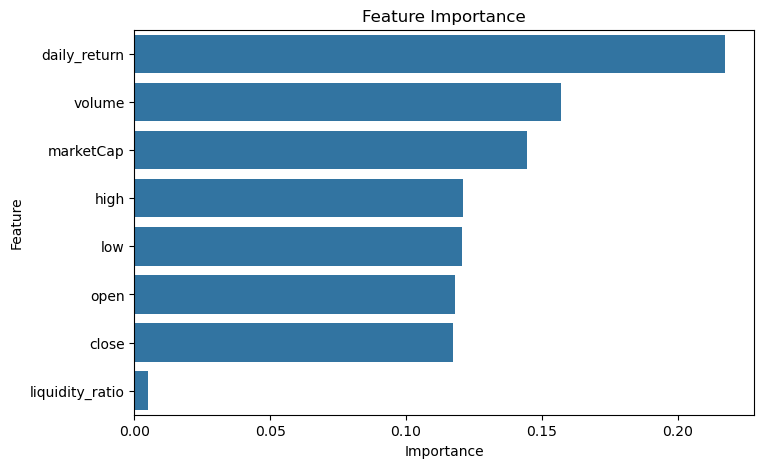

In [204]:
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Feature Importance")
plt.show()

In [205]:
sample = X_test[0].reshape(1, -1)
prediction = model.predict(sample)
print("\nPredicted Volatility Level for sample row:", le.inverse_transform(prediction))


Predicted Volatility Level for sample row: ['Medium']
